<a href="https://colab.research.google.com/github/Lorenzo1208/Brief_fao/blob/main/Brief_fao_couleur%2B%2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Brief FAO

Graphique Pareto malnutrition, population, densité population


In [ ]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

filecsv = ['https://raw.githubusercontent.com/Lorenzo1208/Brief_fao/main/FAOSTAT_2013_animal.csv',
           'https://raw.githubusercontent.com/Lorenzo1208/Brief_fao/main/FAOSTAT_2013_cereal.csv',
           'https://raw.githubusercontent.com/Lorenzo1208/Brief_fao/main/FAOSTAT_2013_population.csv',
           'https://raw.githubusercontent.com/Lorenzo1208/Brief_fao/main/FAOSTAT_2013_sous_alimentation.csv',
           'https://raw.githubusercontent.com/Lorenzo1208/Brief_fao/main/FAOSTAT_2013_vegetal.csv',
           'https://raw.githubusercontent.com/Lorenzo1208/Brief_fao/main/FAOSTAT_2013_superficie.csv',
           'https://raw.githubusercontent.com/Lorenzo1208/Brief_fao/main/FAOSTAT_2013_continent.csv'
           ]

# continent_csv = 'https://raw.githubusercontent.com/Lorenzo1208/Brief_fao/main/FAOSTAT_2013_continent.csv'

#print(f'list : {filecsv}')

blabla = len('https://raw.githubusercontent.com/Lorenzo1208/Brief_fao/main/FAOSTAT_2013_')
conn = sqlite3.connect('bdd.sqlite')
print(blabla)
'''
to_sql()
read_sql_query()
conn.execute("SELECT/INSERT/...")
'''

names = ['Code Domaine', 'Domaine', 'Code Pays', 'Pays', 'Code Élément',
       'Élément', 'Code Produit', 'Produit', 'Code Année', 'Année', 'Unité',
       'Valeur', 'Symbole', 'Description du Symbole']

for i in filecsv:
    if i != 'https://raw.githubusercontent.com/Lorenzo1208/Brief_fao/main/FAOSTAT_2013_continent.csv':
      #print(i[79:-4])
      df_tabs = pd.read_csv(i, names = names, header = 0)
    else :
      df_tabs = pd.read_csv(i, header = 0)
      #df_tabs.index = df_tabs['Code Pays']
    df_tabs.to_sql(i[blabla:-4], con=conn, if_exists='replace')
      #crée un fichier bdd.sqlite avec nos 5 tables
      #print(i[38:-4])

74


/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:2872: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


In [ ]:
conn = sqlite3.connect('bdd.sqlite')

"""
df_population = pd.read_sql_query('''select Pays,"Code Pays",Valeur AS valeur_population
                           from population;''', con=conn)
#print(df_population)

df_cereal = pd.read_sql_query('''select "Code Pays",
                              Valeur AS valeur_cereal from cereal where Élément='Production' AND
                              Produit='Blé' ORDER BY "Code Pays";''', con=conn)
#print(df_cereal)
"""


df_graph = pd.read_sql_query('''SELECT cereal.Pays,
                             population."Code Pays",
                             population.Valeur AS valeur_population,
                             cereal.Valeur AS valeur_cereal,
                             superficie.Valeur AS valeur_superficie,
                             sous_alimentation.Valeur AS valeur_sous_alimentation,
                             continent."Groupe de pays",
                             continent."Code Groupe de pays"
                             
                             FROM population
                             
                             INNER JOIN sous_alimentation
                             ON (population."Code Pays" = sous_alimentation."Code Pays")
                             
                             INNER JOIN superficie
                             ON (population."Code Pays" = superficie."Code Pays")

                             INNER JOIN cereal
                             ON (population."Code Pays" = cereal."Code Pays")

                             INNER JOIN continent
                             ON (population."Code Pays" = continent."Code Pays")

                             WHERE (cereal.Élément='Production'
                             AND cereal.Produit='Blé'
                             AND cereal.Valeur > 0
                             AND sous_alimentation.Valeur > 0
                             AND superficie.Année = 2013
                             AND superficie.Valeur > 0
                             AND "Code Groupe de pays"%100==0 
                             AND "Code Groupe de pays" <> 5000 )
                             
                             ORDER BY population."Code Pays";''', con=conn)

df_graph['valeur_densité'] = df_graph['valeur_population'] / df_graph['valeur_superficie']

df_graph

,Pays,Code Pays,valeur_population,valeur_cereal,valeur_superficie,valeur_sous_alimentation,Groupe de pays,Code Groupe de pays,valeur_densité
0,Arménie,1,2977,312.0,2974.00,0.1,Asie,5300,1.001009
1,Afghanistan,2,30552,5169.0,65286.00,8.1,Asie,5300,0.467972
2,Albanie,3,3173,294.0,2875.00,0.2,Europe,5400,1.103652
3,Algérie,4,39208,3299.0,238174.00,1.8,Afrique,5100,0.164619
4,Angola,7,21472,4.0,124670.00,8.0,Afrique,5100,0.172231
...,...,...,...,...,...,...,...,...,...
59,Yémen,249,24407,232.0,52797.00,7.1,Asie,5300,0.462280
60,Zambie,251,14539,274.0,75261.00,7.0,Afrique,5100,0.193181
61,Serbie,272,9511,2690.0,8836.00,0.5,Europe,5400,1.076392
62,Soudan,276,37964,265.0,187800.00,9.3,Afrique,5100,0.202151


In [ ]:
import random
from matplotlib.patches import Patch
import matplotlib.pyplot as plt
import numpy as np
# Fonction qui prend un DataFrame en entrée et qui trace un graphique en utilisant matplotlib
def create_graph(df_graph):
  # Demande à l'utilisateur de saisir le nom de la colonne à utiliser pour tracer le graphique
  column = input("Veuillez saisir le nom de la colonne à utiliser pour tracer le graphique: ")
  # Vérification que la colonne saisie existe dans le DataFrame
  if column not in df_graph.columns:
    print("La colonne saisie n'existe pas dans le DataFrame.")
    return
  # Tri du DataFrame par ordre décroissant sur la colonne courante
  df_graph = df_graph.sort_values(by=column, ascending=False)
  # Ajout d'une colonne cumulée qui contient la somme cumulée des valeurs de la colonne courante, exprimée en pourcentage
  cumperc = df_graph[column].cumsum()/df_graph[column].sum()*100
  df_graph['cumperc'] = cumperc
  # Mapping des couleurs en fonction du groupe de pays
  color_mapping = {'Europe': 'blue', 'Afrique': 'red', 'Asie': 'green', 'Amériques': 'cyan'}
  colors = df_graph['Groupe de pays'].map(color_mapping).fillna('black').values
  # Couleur de la ligne sur le graphique secondaire
  color2 = 'red'
  # Épaisseur de la ligne sur le graphique secondaire
  line_size = 4
  # Création des figures et des axes
  fig, ax = plt.subplots()
  # Tracé d'un graphique à barres
  plt.bar(df_graph.Pays, df_graph[column], color=colors)
  # Configuration de la taille de la figure
  fig.set_size_inches(18.5, 10.5)
  # Rotation des étiquettes sur l'axe des x et ajustement de leur taille
  plt.xticks(rotation=90, ha="right", fontsize=8)
  # Titre du graphique
  plt.title(column, fontsize=20)
  # Titre de l'axe des x
  plt.xlabel('Pays',fontsize=20)
  # Titre de l'axe des y
  plt.ylabel('Valeurs',fontsize=20)
  # Création de la légende du graphique
  patches = []
  for color, group in df_graph.groupby('Groupe de pays'):
    patches.append(Patch(color=color_mapping[group['Groupe de pays'].iloc[0]], label=group['Groupe de pays'].iloc[0]))

  plt.legend(handles=patches, loc='lower right')
  # Création d'un second axe pour tracer une ligne sur le même graphique
  ax2 = ax.twinx()
  # Tracé d'une ligne sur le graphique secondaire en utilisant les valeurs de la colonne 'cumperc'
  # La couleur de la ligne est définie par la variable 'color2'
  # Les marqueurs sont des losanges et leur taille est définie par la variable 'line_size'
  ax2.plot(df_graph.Pays, cumperc, color=color2, marker="D", ms=line_size)
  # Formatage des étiquettes de l'axe des y du graphique secondaire en pourcentage
  ax2.yaxis.set_major_formatter(PercentFormatter())
  # Modification de la couleur des étiquettes de l'axe des y du graphique secondaire
  ax2.tick_params(axis='y', colors=color2)
  # Affichage du graphique
  plt.show()

Veuillez saisir le nom de la colonne à utiliser pour tracer le graphique: valeur_densité


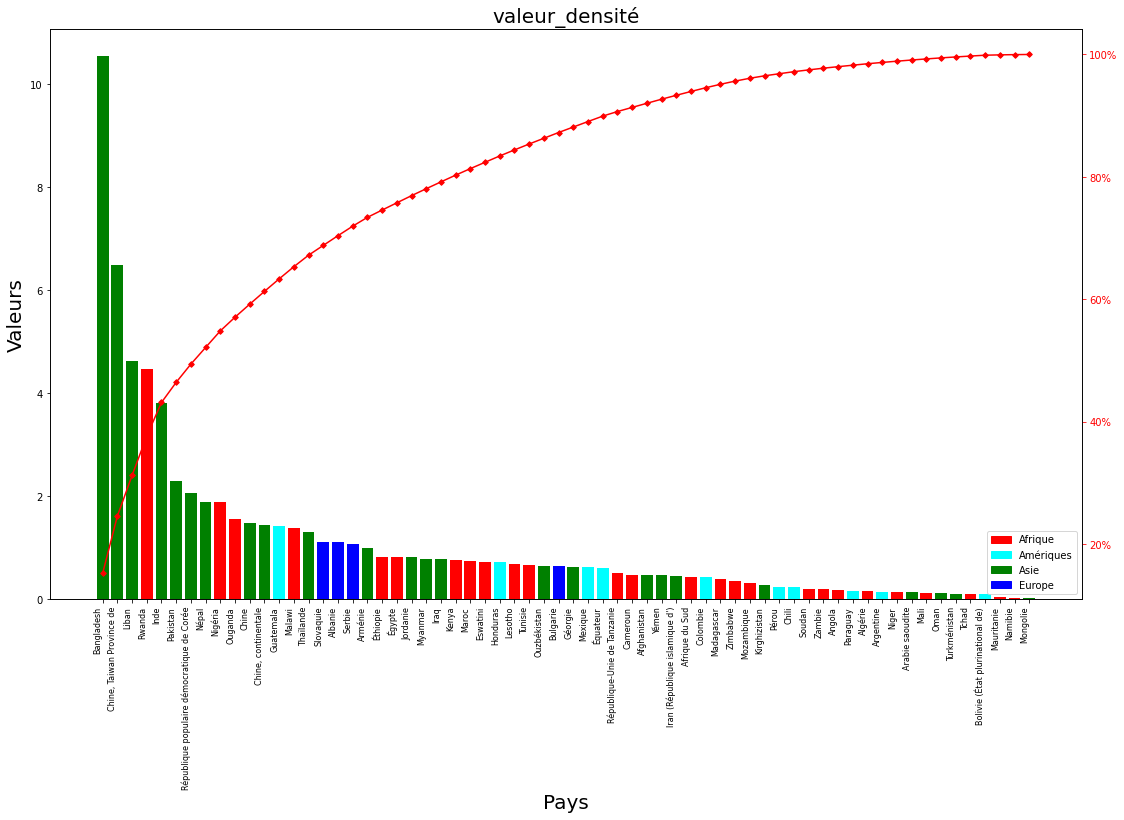

In [ ]:
create_graph(df_graph)

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

def create_graph2(df_graph):
  column = input("Veuillez saisir le nom de la colonne à utiliser pour tracer le graphique: ")
  if column not in df_graph.columns:
    print("La colonne saisie n'existe pas dans le DataFrame.")
    return

  df_graph = df_graph.sort_values(by=column, ascending=False)
  cumperc = df_graph[column].cumsum()/df_graph[column].sum()*100
  df_graph['cumperc'] = cumperc
  color_mapping = {'Europe': 'blue', 'Afrique': 'red', 'Asie': 'green', 'Amériques': 'cyan'}
  df_graph['color'] = df_graph['Groupe de pays'].map(color_mapping).fillna('black')

  fig = go.Figure()
  fig.add_bar(x=df_graph.Pays, y=df_graph[column], name=column, marker_color=df_graph['color'])

  fig.add_scatter(x=df_graph.Pays, y=cumperc, yaxis='y2', name='Cumperc', marker=dict(symbol='diamond', size=4), line=dict(color='red', width=4))
  fig.update_layout(title=column, xaxis_title='Pays', yaxis_title='Valeurs', yaxis2=dict( overlaying='y', side='right', showgrid=False), legend=dict(title='Groupe de pays'))
  fig.show()



In [ ]:
l

In [ ]:
create_graph2(df_graph)

Veuillez saisir le nom de la colonne à utiliser pour tracer le graphique: valeur_densité
